In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
links = pd.read_csv('email-links-all.csv')

In [3]:
links.shape

(614586, 3)

In [4]:
links.head()

,Date,From,To
0,2001-05-14 23:39:00,phillip.allen@enron.com,tim.belden@enron.com
1,2001-05-04 20:51:00,phillip.allen@enron.com,john.lavorato@enron.com
2,2000-10-18 10:00:00,phillip.allen@enron.com,leah.arsdall@enron.com
3,2000-10-23 13:13:00,phillip.allen@enron.com,randall.gay@enron.com
4,2000-08-31 12:07:00,phillip.allen@enron.com,greg.piper@enron.com


Count the number of contact events between emails

In [5]:
weight_counts = links.groupby(['From', 'To']).size().reset_index(name = 'Count')
weight_counts.to_csv('weighted_links.csv', index=False)

In [7]:
weight_counts.shape

(83777, 3)

In [13]:
weight_counts.sort_values('Count').head()

,From,To,Count
0,101qi@msn.com,enlvwvz@msn.com,1
39637,karen.snow@enron.com,karen.snow@enron.com,1
39639,karen.snow@enron.com,victor.lamadrid@enron.com,1
39647,karen.white@csfb.com,klay@enron.com,1
39648,karen@mpenner.com,jarnold@enron.com,1


In [9]:
thresholded = weight_counts.loc[weight_counts['Count'] > 10]

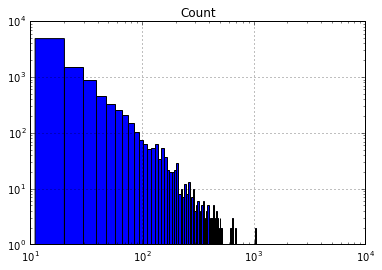

In [10]:
fig, ax = plt.subplots()
thresholded.hist(ax=ax, column='Count', bins=1000)
ax.set_xscale('log')
ax.set_yscale('log')

Count From messages per email

In [14]:
from_counts = links.groupby(['From']).size().reset_index(name = 'CountFrom')
from_counts.sort_values('CountFrom').head()

,From,CountFrom
0,101qi@msn.com,1
2213,civella644@yahoo.com,1
2214,cjackson1@txu.com,1
8396,mischiefandmagic@aol.com,1
8395,miriam.brabham@enron.com,1


Group by day

In [20]:
times = pd.DatetimeIndex(links.Date)

In [32]:
links.groupby([times.day]).sum()

,Date,From,To
Date,,,
1,2000-09-01 13:08:002000-09-01 13:08:002001-05-...,phillip.allen@enron.comphillip.allen@enron.com...,mike.grigsby@enron.comfrank.ermis@enron.comala...
2,2000-10-02 09:19:002001-05-02 19:36:002001-05-...,phillip.allen@enron.comphillip.allen@enron.com...,bs_stone@yahoo.comjames.steffes@enron.comtori....
3,2000-10-03 16:30:002000-10-03 16:15:002000-10-...,phillip.allen@enron.comphillip.allen@enron.com...,pallen70@hotmail.comina.rangel@enron.combs_sto...
4,2001-05-04 20:51:002000-10-04 16:23:002001-05-...,phillip.allen@enron.comphillip.allen@enron.com...,john.lavorato@enron.comina.rangel@enron.comtim...
5,2000-10-05 13:26:002000-10-05 12:55:002000-09-...,phillip.allen@enron.comphillip.allen@enron.com...,david.delainey@enron.compaula.harris@enron.com...
6,2000-09-06 15:54:002000-09-06 14:02:002000-09-...,phillip.allen@enron.comphillip.allen@enron.com...,pallen70@hotmail.comina.rangel@enron.comina.ra...
7,2000-08-07 12:43:002000-08-07 09:14:002000-08-...,phillip.allen@enron.comphillip.allen@enron.com...,matt.smith@enron.comstagecoachmama@hotmail.com...
8,2000-09-08 12:30:002000-09-08 12:29:002000-08-...,phillip.allen@enron.comphillip.allen@enron.com...,pallen70@hotmail.compallen70@hotmail.comina.ra...
9,2000-10-09 14:16:002000-10-09 14:00:002000-08-...,phillip.allen@enron.comphillip.allen@enron.com...,keith.holst@enron.comkeith.holst@enron.comkeit...


In [33]:
links.resample('D')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'